# 중첩 점 (구름톤 18일차)
- 난이도: ★★★
- https://level.goorm.io/exam/195700/%EC%A4%91%EC%B2%A9-%EC%A0%90/quiz/1

## [문제]

한 변의 길이가 $N$인 정사각형이 있다. 플레이어는 이 정사각형 위에 $M$개의 반직선을 그린 뒤, 두 반직선이 교차하는 점의 개수를 세려고 한다. 플레이어가 반직선을 그리는 과정은 아래와 같다.

1. 반직선을 그리기 시작할 칸 $(y, x)$를 정한다. $(y, x)$는 주어진 정사각형을 $1 \times 1$ 크기의 정사각형으로 나눴을 때, $y$번째 행의 $x$번째 열에 해당하는 칸이다.
2. 반직선을 그릴 방향 $d$를 정한다. 방향은 상하좌우 중 하나이며, 항상 정사각형 테두리의 가로 혹은 세로와 평행하다.
3. 반직선을 그린다. 반직선은 항상 시작 칸의 테두리에서부터 시작하며, 같은 칸을 지나는 평행한 직선이 서로 만나지 않도록 그린다.

아래 그림은 길이가 $4$인 정사각형 위에 다음 세 개의 직선을 그린 그림이다.
- $(3, 2)$, 오른쪽 / $(3, 3)$, 왼쪽 / $(3, 2)$, 위쪽

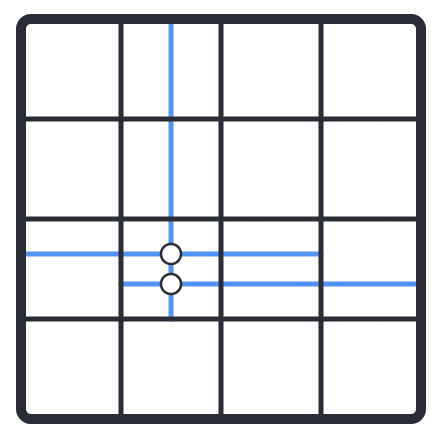

$(3, 2)$ 칸과 $(3, 3)$ 칸을 지나는 두 개의 가로 반직선이 있지만, 두 반직선은 서로 평행하기 때문에 중첩 점이 생기지 않는다. 그러나 $(3, 2)$ 칸을 지나는 세로 반직선과 두 반직선은 교차하므로 결과적으로는 두 개의 **중첩 점**이 생긴다.

플레이어가 모든 반직선을 그린 뒤 생기는 중첩 점의 개수를 구해보자.

## [예제 설명]

첫 번째 예제를 그림으로 나타내면 아래와 같이 **여섯 개**의 중첩 점이 생긴다.

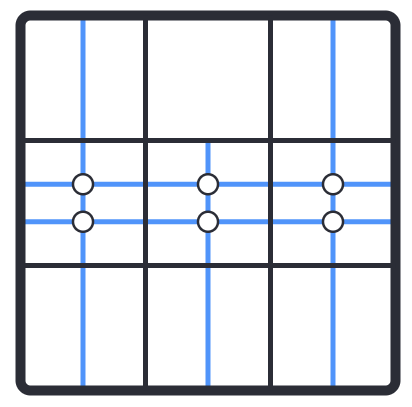

## [입력]

첫째 줄에 정사각형의 크기 $N$과 그리려는 반직선의 개수 $M$이 공백을 두고 주어진다.

다음 $M$개의 줄에는 플레이어가 그을 반직선의 정보를 나타내는 $y_i , x_i, d_i$가 공백을 두고 주어진다. $(y_i , x_i)$ 칸에서 시작해 $d_i$ 방향으로 반직선을 긋는다는 의미이다.

- $1 \le N \le 100$
- $1 \le M \le 100,000$
- $1 \le x_i , y_i \le N$
- $d_i$는 ```U```, ```D```, ```L```, ```R```의 네 문자 중 하나이다. 각각 상하좌우 방향을 의미한다.

## [출력]

모든 반직선을 그렸을 때, 중첩 점의 개수를 출력하시오.

## [예시]

**예시 1**

입력
```
3 5
2 1 R
1 1 D
2 3 L
3 3 U
2 2 D
```

출력
```
6
```

**예시 2**

입력
```
3 3
2 2 R
2 2 L
1 2 D
```

출력
```
2
```

In [1]:
# My Solution
n, m = map(int, input().split())
squares = [[[0, 0] for _ in range(n)] for __ in range(n)] #[가로, 세로]
for _ in range(m):
    y, x, d = input().split()
    y, x = int(y) - 1, int(x) - 1
    if d == 'U':
        while True: #위쪽 방향 모든 칸에 세로 줄 추가
            if y < 0 or y >= n:
                break
            squares[y][x][1] += 1
            y -= 1
    elif d == 'D': #아래쪽 방향 모든 칸에 세로 줄 추가
        while True:
            if y < 0 or y >= n:
                break
            squares[y][x][1] += 1
            y += 1
    elif d == 'L': #왼쪽 방향 모든 칸에 가로 줄 추가
        while True:
            if x < 0 or x >= n:
                break
            squares[y][x][0] += 1
            x -= 1
    elif d == 'R': #오른쪽 방향 모든 칸에 가로 줄 추가
        while True:
            if x < 0 or x >= n:
                break
            squares[y][x][0] += 1
            x += 1

answer = 0
for row in squares:
    for element in row:
        answer += element[0] * element[1] #교점의 개수 = 가로 줄 개수 * 세로 줄 개수

print(answer)

3 5
2 1 R
1 1 D
2 3 L
3 3 U
2 2 D
6


## [후기]

반직선을 한 줄씩 받을 때마다 ```squares``` 리스트에 저장하도록 했다. 이때 가로 줄과 세로 줄을 따로 받도록 했다. 그렇게 한 이유는 추후에 교점의 개수를 구할 때 한 사각형 안에 존재하는 **가로 줄의 개수와 세로 줄의 개수를 곱해주면** 되기 때문이다.